In [11]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# Manejo de datos
ruta_de_archivo = '/content/resultados_eventos.csv'
data = pd.read_csv(ruta_de_archivo)

In [4]:
data.head()

,id_odsp,event_type1,event_type2,event_type3,event_type4,event_type6,event_type7,event_type8,event_type9,event_type10,event_type11
0,00LMl81F/,39.0,17.0,24.0,5.0,1.0,6.0,24.0,6.0,3.0,0.0
1,00o3l4Ui/,31.0,9.0,35.0,2.0,0.0,6.0,35.0,3.0,0.0,0.0
2,02zs6b5s/,33.0,10.0,32.0,4.0,0.0,6.0,34.0,7.0,2.0,0.0
3,06djNeRR/,26.0,10.0,33.0,3.0,0.0,6.0,33.0,9.0,1.0,0.0
4,08DG4Hyq/,27.0,13.0,35.0,2.0,0.0,6.0,35.0,6.0,0.0,0.0


In [15]:
max_value = data['event_type2'].max()
print(f"El valor máximo en la columna 'event_type2' es: {max_value}")

El valor máximo en la columna 'event_type2' es: 23.0


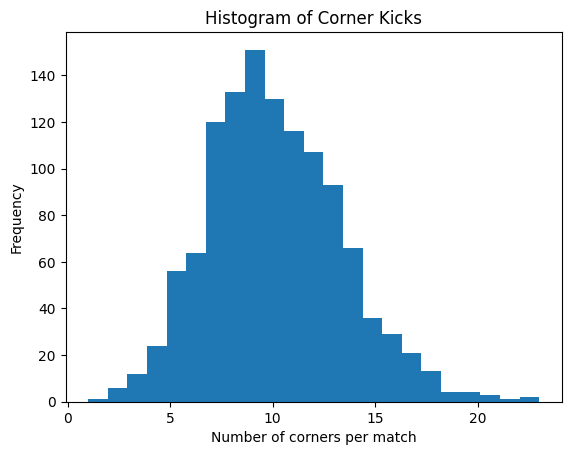

In [33]:
plt.hist(data['event_type2'], bins=23)
plt.xlabel('Number of corners per match')
plt.ylabel('Frequency')
plt.title('Histogram of Corner Kicks')
plt.show()

Mean: 10.02265100671141
Standard Deviation: 3.416598403385415


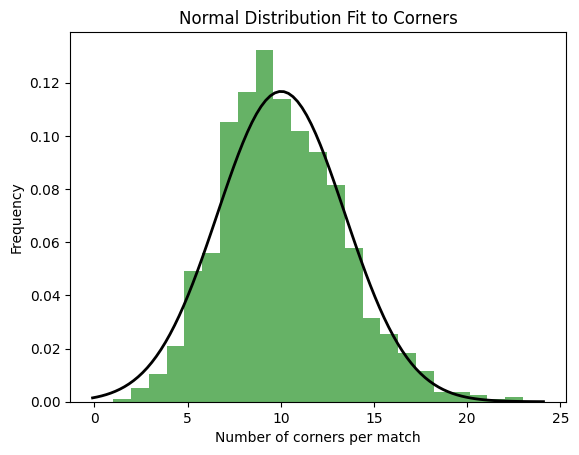

In [34]:
# Fit a normal distribution to the 'event_type2' column
mean, std = norm.fit(data['event_type2'])

# Print the fitted parameters
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

# Plot the histogram and fitted distribution
plt.hist(data['event_type2'], bins=23, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Normal Distribution Fit to Corners')
plt.xlabel('Number of corners per match')
plt.ylabel('Frequency')
plt.show()

In [23]:
def probability_above_threshold(line=15):
  """Calculates the probability of 'event_type2' being above a given threshold.

  Args:
    line: The threshold value.

  Returns:
    The probability of 'event_type2' exceeding the threshold.
  """
  # Calculate the z-score
  z = (line - mean) / std

  # Calculate the probability using the survival function (1 - CDF)
  probability = 1 - norm.cdf(z)

  return probability

In [26]:
probability_above_threshold(10)


0.5026448464256312

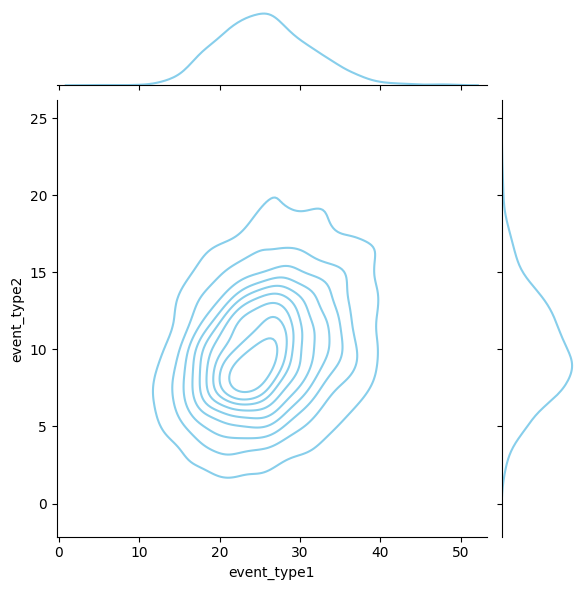

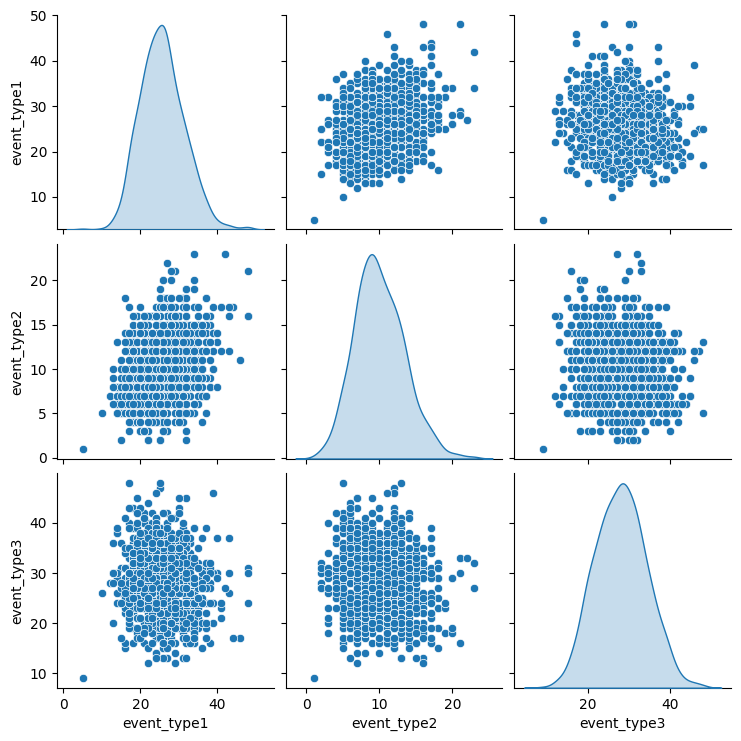

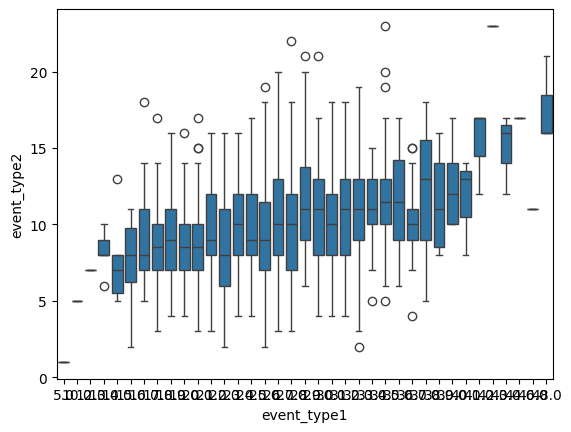

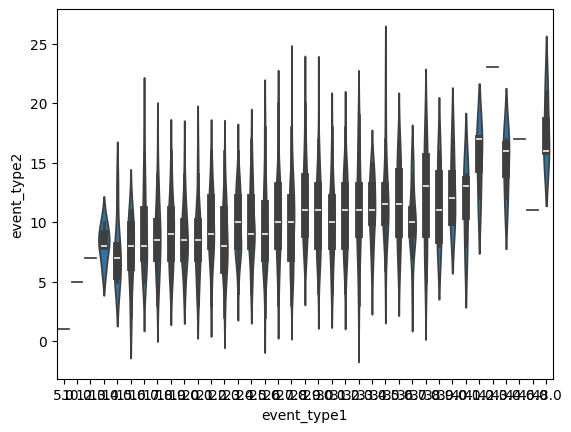

In [30]:
import seaborn as sns

# visualize the relationship between 'event_type2' and 'event_type1'
sns.jointplot(x='event_type1', y='event_type2', data=data, kind='kde', color='skyblue')
plt.show()


# Pairplot for multiple features
sns.pairplot(data[['event_type1', 'event_type2', 'event_type3']], diag_kind='kde') # Replace with actual column names
plt.show()

# Boxplot for visualizing distribution and outliers
sns.boxplot(x='event_type1', y='event_type2', data=data) # Replace with actual column names
plt.show()

# Violin plot for visualizing distributions
sns.violinplot(x='event_type1', y='event_type2', data=data)  #Replace with actual column names
plt.show()


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'event_type2' is your target variable and other columns are features
X = data.drop('event_type2', axis=1)  # Features
y = data['event_type2']  # Target variable

# Convert non-numeric columns to numerical if needed.  For example using one-hot encoding
X = pd.get_dummies(X, drop_first = True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear') # Specify a solver that works well for small datasets.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00        13
         6.0       0.00      0.00      0.00        12
         7.0       0.00      0.00      0.00        27
         8.0       0.15      0.27      0.19        26
         9.0       0.10      0.55      0.17        22
        10.0       0.09      0.06      0.08        31
        11.0       0.00      0.00      0.00        17
        12.0       0.11      0.05      0.07        21
        13.0       0.00      0.00      0.00        21
        14.0       0.17      0.13      0.15        15
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         7
        17.0       0.00      0.00      0.00         5
        18.0       0.00      0.00      0.00         3
        19.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval(test_labels, test_predictions):
    spear = stats.spearmanr(test_labels, test_predictions)
    r2 = r2_score(test_labels, test_predictions)
    mse = mean_squared_error(test_labels, test_predictions)
    mae = mean_absolute_error(test_labels, test_predictions)
    print(f"MAE: {mae}, MSE: {mse}, R2: {r2}, Spearman: {spear.statistic}")

In [32]:
eval(y_test, y_pred)


MAE: 2.8577405857740588, MSE: 13.334728033472803, R2: -0.06874580818242793, Spearman: 0.2176796917455643
